## Fermat-Punkt
    
GDM Beitrag zum Fermat-Problem, Linnemann, Guggisberg, Trachsler, GDM 2015 Basel

__[HTML-5 Präsentation](http://mgje.github.io/presentations/GDM2015/#/)__

![fermat](../python_in_der_wissenschaft/media/fermat.png)

[Interaktive App (GeoGebra)](http://tube.geogebra.org/m/52934)

In [4]:
from math import *

def distanz(a,b):
    return sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    
def schwerpunkt(punkte):
    x0=y0=0.0
    n = len(punkte)
    for P in punkte:
        x0=x0+P[0]
        y0=y0+P[1]
    return (x0/n,y0/n)

def WeiszmanIteration(P, punkte):
    """
    Return a new approximation to the geometric median 
    of `points` by applying one iteration of Weiszfeld's 
    algorithm to the old appromixation P.
    """
    W = x = y = 0.0
    for Q in punkte:
        d = distanz(P, Q)
        if d != 0:
            w = 1.0 / d
            W += w
            x += Q[0] * w
            y += Q[1] * w
    return x / W, y / W


def fermatpunkt(punkte, epsilon):
    """
    Return an approximation to the geometric median for 
    `points`. Start with the centroid and apply Weiszfeld's 
    algorithm until the distance between steps is less 
    than `epsilon`.
    """
    P = schwerpunkt(punkte)
    while True:
        Q = WeiszmanIteration(P, punkte)
        if distanz(P, Q) < epsilon:
            return Q
        P = Q
        


In [31]:
# Definition der Städte (Punkte)

Punkte = []
A = [1,10]
Punkte.append(A)    
B = [5,1]
Punkte.append(B) 
C = [11,6]
Punkte.append(C) 
#D = [6,6]
#Punkte.append(D) 
#E = [10,7]
#Punkte.append(E) 
#F = [4,7]
#Punkte.append(F) 

In [24]:
def sumdist(Q,punkte):
    ds = 0
    for P in punkte:
        ds += distanz(P,Q)
    return ds

In [56]:
# Berechnung einer Abstands-Matrix
import numpy as np
xdim = np.linspace(0,12,36)
ydim = np.linspace(0,12,36)

M = [[sumdist([x_,y_],Punkte) for x_ in xdim] for y_ in ydim]

#print(M)
#print(xdim)

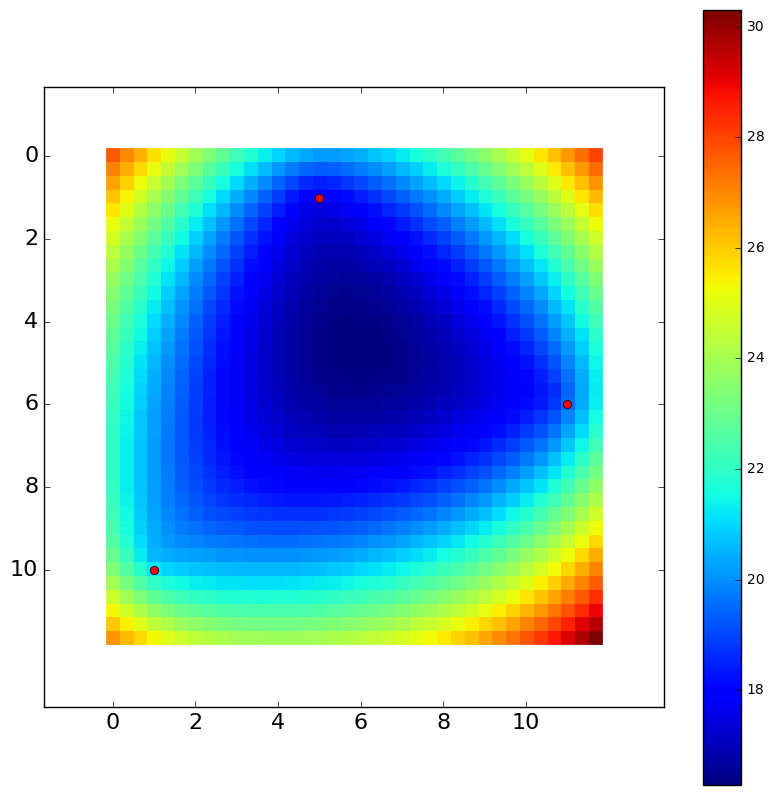

In [64]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
x_=[]
y_=[]
for p in Punkte:
    x_.append(p[0]*3)
    y_.append(p[1]*3)
    
figure(figsize=(10, 10))
imshow(M,interpolation="nearest")
plot(x_,y_,'ro')
xticks(np.arange(0,36,6),np.arange(0,12,2),size=16)
yticks(np.arange(0,36,6),np.arange(0,12,2),size=16)
colorbar()


In [60]:
np.arange(0,36,10)



array([ 0, 10, 20, 30])

In [27]:
# Berechnung des Schwerpunktes und des Fermat-Punktes      

print(Punkte)
print(schwerpunkt(Punkte))  
print(fermatpunkt(Punkte, 0.01))

[[3, 10], [4, 9], [6, 10]]
(4.333333333333333, 9.666666666666666)
(4.031616293046831, 9.238368105044017)
